In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')

In [4]:
df.head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
4,30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

/Users/davidwilson/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,age_midpoint,experience_midpoint,salary_midpoint,big_mac_index,programming_ability
count,56030.000000,55336.000000,49520.000000,41742.000000,48825.000000,46982.000000
mean,28014.500000,29.621286,6.640145,53952.973025,3.907442,7.094547
std,16174.612128,9.108102,4.446157,46518.823875,1.120232,1.766312
min,0.000000,16.000000,0.500000,5000.000000,1.530000,1.000000
25%,14007.250000,NaN,NaN,NaN,NaN,NaN
50%,28014.500000,NaN,NaN,NaN,NaN,NaN
75%,42021.750000,NaN,NaN,NaN,NaN,NaN
max,56029.000000,65.000000,13.000000,210000.000000,6.440000,10.000000


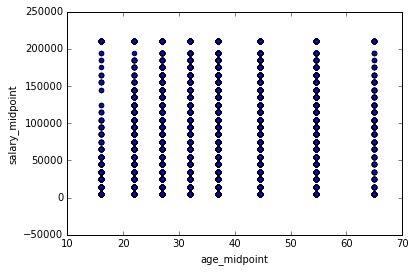

In [6]:
df.plot(x='age_midpoint',y='salary_midpoint',kind='scatter')

In [7]:
df["age_category"] = df["age_range"].astype("category")

In [8]:
df["age_category"].describe()

count     55727
unique        9
top       25-29
freq      15702
Name: age_category, dtype: object

In [9]:
df.groupby("age_category").size()

age_category
20-24                     13055
25-29                     15702
30-34                     10018
35-39                      5657
40-49                      4905
50-59                      1640
< 20                       3937
> 60                        422
Prefer not to disclose      391
dtype: int64

In [10]:
df["age_category"] = df["age_category"].cat.set_categories([ '< 20', '20-24', '25-29', '30-34', '35-39', '40-49', '50-59', '> 60','Prefer not to disclose'])

In [11]:
df.groupby("age_category").size()

age_category
< 20                       3937
20-24                     13055
25-29                     15702
30-34                     10018
35-39                      5657
40-49                      4905
50-59                      1640
> 60                        422
Prefer not to disclose      391
dtype: int64

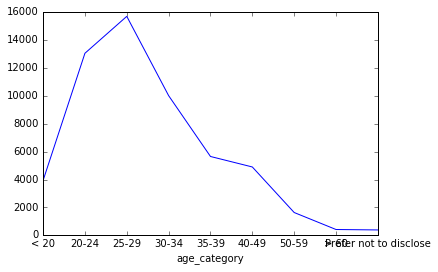

In [12]:
df.groupby("age_category").size().plot()

In [13]:
df["salary_range"].describe()

count                 46121
unique                   24
top       Less than $10,000
freq                   7686
Name: salary_range, dtype: object

In [14]:
df["salary_category"] = df["salary_range"].astype('category')

In [15]:
df["salary_category"].describe()

count                 46121
unique                   24
top       Less than $10,000
freq                   7686
Name: salary_category, dtype: object

In [16]:
df.groupby("salary_category").size()

salary_category
$10,000 - $20,000         4977
$100,000 - $110,000       1653
$110,000 - $120,000       1086
$120,000 - $130,000        917
$130,000 - $140,000        608
$140,000 - $150,000        569
$150,000 - $160,000        472
$160,000 - $170,000        278
$170,000 - $180,000        206
$180,000 - $190,000        136
$190,000 - $200,000        117
$20,000 - $30,000         3677
$30,000 - $40,000         3429
$40,000 - $50,000         3291
$50,000 - $60,000         3138
$60,000 - $70,000         2823
$70,000 - $80,000         2500
$80,000 - $90,000         1834
$90,000 - $100,000        1684
Less than $10,000         7686
More than $200,000         661
Other (please specify)     253
Rather not say            2246
Unemployed                1880
dtype: int64

In [17]:
df["salary_category"] = df["salary_category"].cat.set_categories([ 'Unemployed','Less than $10,000','$10,000 - $20,000', '$20,000 - $30,000','$30,000 - $40,000', '$40,000 - $50,000', '$50,000 - $60,000',
       '$60,000 - $70,000', '$70,000 - $80,000', '$80,000 - $90,000',
       '$90,000 - $100,000', '$100,000 - $110,000', '$110,000 - $120,000',
       '$120,000 - $130,000', '$130,000 - $140,000', '$140,000 - $150,000',
       '$150,000 - $160,000', '$160,000 - $170,000', '$170,000 - $180,000',
       '$180,000 - $190,000', '$190,000 - $200,000', 
         'More than $200,000',
       'Other (please specify)', 'Rather not say'])

In [18]:
df.groupby("salary_category").size()

salary_category
Unemployed                1880
Less than $10,000         7686
$10,000 - $20,000         4977
$20,000 - $30,000         3677
$30,000 - $40,000         3429
$40,000 - $50,000         3291
$50,000 - $60,000         3138
$60,000 - $70,000         2823
$70,000 - $80,000         2500
$80,000 - $90,000         1834
$90,000 - $100,000        1684
$100,000 - $110,000       1653
$110,000 - $120,000       1086
$120,000 - $130,000        917
$130,000 - $140,000        608
$140,000 - $150,000        569
$150,000 - $160,000        472
$160,000 - $170,000        278
$170,000 - $180,000        206
$180,000 - $190,000        136
$190,000 - $200,000        117
More than $200,000         661
Other (please specify)     253
Rather not say            2246
dtype: int64

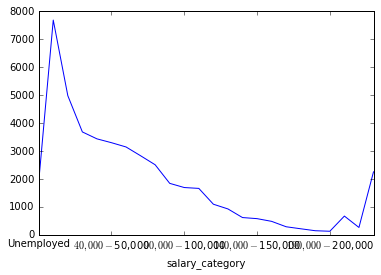

In [19]:
df.groupby("salary_category").size().plot()

In [21]:
df.columns

Index(['Unnamed: 0', 'collector', 'country', 'un_subregion', 'so_region',
       'age_range', 'age_midpoint', 'gender', 'self_identification',
       'occupation', 'occupation_group', 'experience_range',
       'experience_midpoint', 'salary_range', 'salary_midpoint',
       'big_mac_index', 'tech_do', 'tech_want', 'aliens',
       'programming_ability', 'employment_status', 'industry',
       'company_size_range', 'team_size_range', 'women_on_team', 'remote',
       'job_satisfaction', 'job_discovery', 'dev_environment',
       'commit_frequency', 'hobby', 'dogs_vs_cats', 'desktop_os',
       'unit_testing', 'rep_range', 'visit_frequency', 'why_learn_new_tech',
       'education', 'open_to_new_job', 'new_job_value', 'job_search_annoyance',
       'interview_likelihood', 'how_to_improve_interview_process',
       'star_wars_vs_star_trek', 'agree_tech', 'agree_notice',
       'agree_problemsolving', 'agree_diversity', 'agree_adblocker',
       'agree_alcohol', 'agree_loveboss', 'agree_n

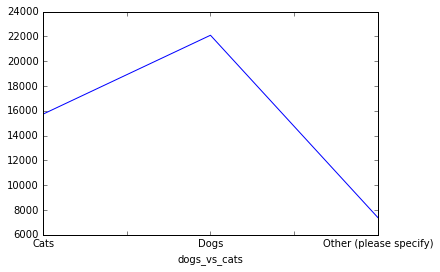

In [26]:
df.groupby('dogs_vs_cats').size().plot()

In [29]:
df[['star_wars_vs_star_trek','dogs_vs_cats','agree_adblocker']]

,star_wars_vs_star_trek,dogs_vs_cats,agree_adblocker
0,NaN,NaN,NaN
1,Star Wars,Cats,Agree completely
2,NaN,NaN,NaN
3,NaN,Cats,Agree completely
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,Cats,NaN
7,NaN,NaN,Neutral
8,NaN,NaN,NaN
9,NaN,Dogs,Disagree somewhat


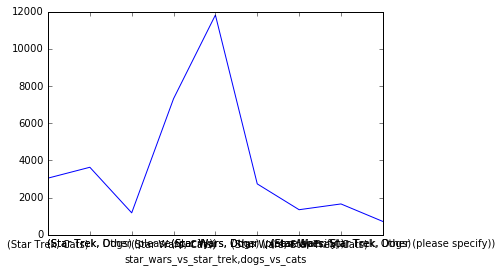

In [32]:
df.groupby(['star_wars_vs_star_trek','dogs_vs_cats']).size().plot()

In [33]:
df.groupby(['star_wars_vs_star_trek','dogs_vs_cats']).size()

star_wars_vs_star_trek  dogs_vs_cats          
Star Trek               Cats                       3052
                        Dogs                       3636
                        Other (please specify)     1186
Star Wars               Cats                       7323
                        Dogs                      11820
                        Other (please specify)     2742
Star Wars; Star Trek    Cats                       1354
                        Dogs                       1664
                        Other (please specify)      724
dtype: int64

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [35]:
import seaborn as sns


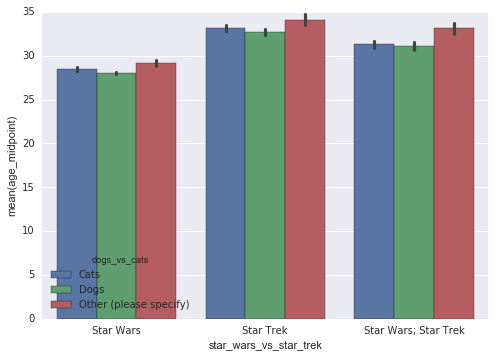

In [41]:
sns.barplot(x='star_wars_vs_star_trek', y="age_midpoint", hue="dogs_vs_cats", data=df)

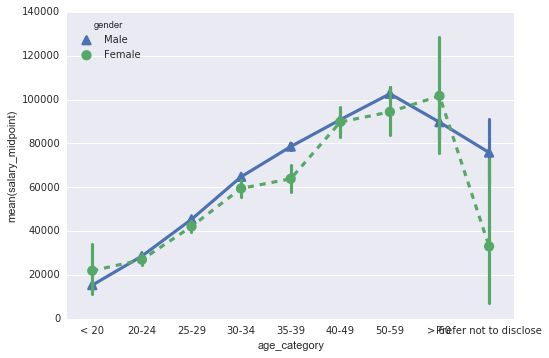

In [70]:
sns.pointplot(x='age_category',y='salary_midpoint', hue='gender', data=df[df['gender'].isin(['Male','Female'])],  markers=["^", "o"], linestyles=["-", "--"])

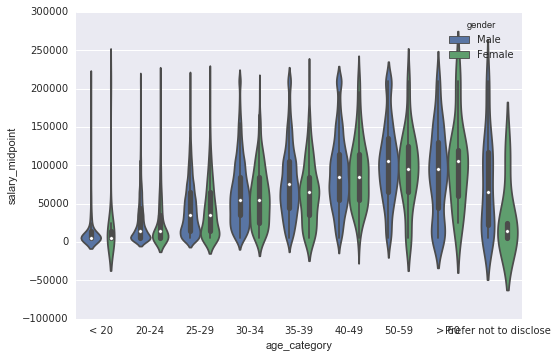

In [73]:
sns.violinplot(x='age_category', y='salary_midpoint', hue='gender', data=df[df['gender'].isin(['Male','Female'])]);

In [ ]:
sns.factorplot(x="age_category", y="salary_midpoint",
               col="gender", data=df[df['gender'].isin(['Male','Female'])], kind="swarm");

KeyboardInterrupt: 